## calculating all the iAUC data from CGM
using the sklearn auc() function and Libre CGM data

In [1]:
import numpy as np
import pandas as pd 
from sklearn.metrics import auc
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime

In [2]:
def libreLinearInterpolation(cgm_df):
    # Convert the 'Date_Time' column to datetime type
    cgm_df['Date_Time'] = pd.to_datetime(cgm_df['Date_Time'])
    # Set the 'Date_Time' column as the index
    cgm_df.set_index('Date_Time', inplace=True)
    # Drop or fill missing values
    cgm_df.dropna(inplace=True)  # Drop rows with missing values
    # Fix duplicate error
    cgm_df = cgm_df.loc[~cgm_df.index.duplicated(), :]
    # Resample the DataFrame to 1-minute intervals and perform linear interpolation
    cgm_df_interpolated = cgm_df.resample('1T').interpolate(method='linear')
    # Reset the index back to a column
    cgm_df_interpolated.reset_index(inplace=True)
    return cgm_df_interpolated

def dexcomLinearInterpolation(raw_cgm_df):
    # Convert the 'Date_Time' column to datetime type
    raw_cgm_df['Date_Time'] = pd.to_datetime(raw_cgm_df['Date_Time'])
    # Set the seconds component to 0
    raw_cgm_df['Date_Time'] = raw_cgm_df['Date_Time'].apply(lambda dt: dt.replace(second=0))
    # Set the 'Date_Time' column as the index
    raw_cgm_df.set_index('Date_Time', inplace=True)
    # Resample the DataFrame to 1-minute intervals and perform linear interpolation
    interpolated_cgm_df = raw_cgm_df.resample('1T').interpolate(method='linear')
    interpolated_cgm_df
    # Reset the index back to a column
    interpolated_cgm_df.reset_index(inplace=True)
    return interpolated_cgm_df

In [10]:
ogdatafile = pd.read_csv("C:\\Users\\namil\\Downloads\\CaM01-004_CGM_Dexcom.csv")
datafile = dexcomLinearInterpolation(ogdatafile)
time = datafile['mins'].to_numpy()
bg = datafile['BG'].to_numpy()
time = time[~np.isnan(time)]
bg = bg[~np.isnan(bg)]
datafile['Date_Time'] = pd.to_datetime(datafile['Date_Time'])

1665110.0


Text(0.5, 1.0, 'overall blood glucose of subject 0002')

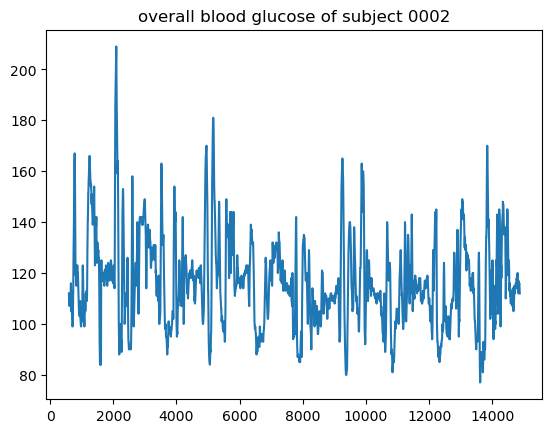

In [11]:

area = auc(time, bg)
print(area)
plt.plot(time,bg)
plt.title('overall blood glucose of subject 0002')

In [14]:
tuples = zip(time,bg)
arr = np.asarray(list(tuples))

#find start time
timestring = '10/11/2021 7:47'
target_time = datetime.strptime(timestring, '%m/%d/%Y %H:%M')
theday = datafile[datafile['Date_Time'].dt.date == target_time.date()]
starttime = theday.iloc[0]['Date_Time']
startmins = theday.iloc[0]['mins']
minutes = int((target_time - starttime).total_seconds() / 60 + startmins)
print(minutes)

14867


224.4
[[14867.    112.4]
 [14868.    112.2]
 [14869.    112. ]]


ValueError: At least 2 points are needed to compute area under curve, but x.shape = 0

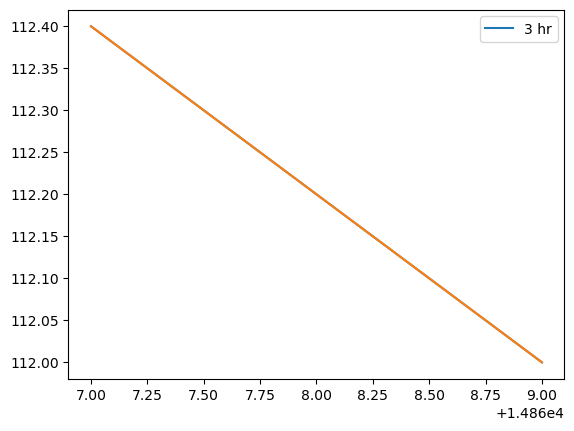

In [22]:
timeframe = 180
#filter to time interval
filtered = arr[arr[:,0] >= minutes]
filtered = filtered[filtered[:,0] <= minutes + timeframe]
plt.plot(filtered[:,0], filtered[:,1], label = "3 hr")
plt.legend()
area = auc(filtered[:,0], filtered[:,1])
print(area)
print(filtered)
filtered = filtered[filtered[:,0] <= minutes + 120]
plt.plot(filtered[:,0], filtered[:,1], label = "2 hr")

#calculate iauc for that time interval
area = auc(filtered[:,0], filtered[:,1])
x = filtered[filtered[:,0] == minutes + 120]
checkempty = auc(x[:,0], x[:,1])

## function to calculate 2 hr and 3 hr iAUC for all meal timestamps

In [8]:
def iaucAll(timestring, twohr, threehr):
    target_time = datetime.strptime(timestring, '%m/%d/%Y %H:%M')
    theday = datafile[datafile['Date_Time'].dt.date == target_time.date()]
    starttime = theday.iloc[0]['Date_Time']
    minutes = int((target_time - starttime).total_seconds() / 60 + theday.iloc[0]['mins'])

    #filter to time interval
    filtered = arr[arr[:,0] >= minutes]
    filtered = filtered[filtered[:,0] <= minutes + 180]
    plt.plot(filtered[:,0], filtered[:,1], label = "3 hr")
    plt.legend()
    area = auc(filtered[:,0], filtered[:,1])
    print("3 hr:" ,area)
    threehr.append(area)

    filtered = filtered[filtered[:,0] <= minutes + 120]
    plt.plot(filtered[:,0], filtered[:,1], label = "2 hr")
   
    #calculate iauc for that time interval
    area = auc(filtered[:,0], filtered[:,1])
    print("2 hr" ,area)
    twohr.append(area)
    plt.show()


10/1/2021 8:04
3 hr: 11279.166666666668
2 hr 6657.5


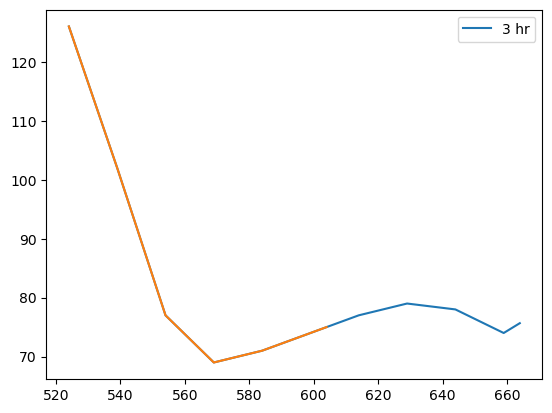


10/1/2021 11:30
3 hr: 17293.9
2 hr 11914.166666666668


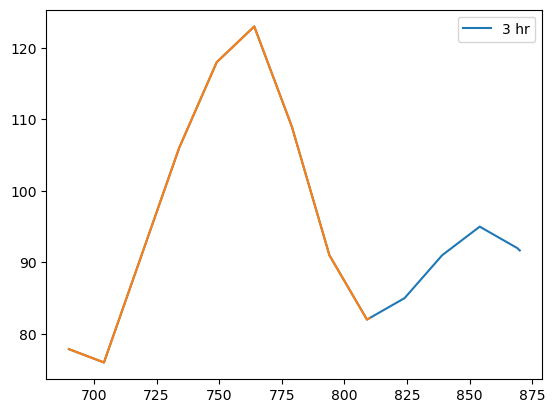


10/1/2021 18:57
3 hr: 19409.933333333334
2 hr 12551.633333333335


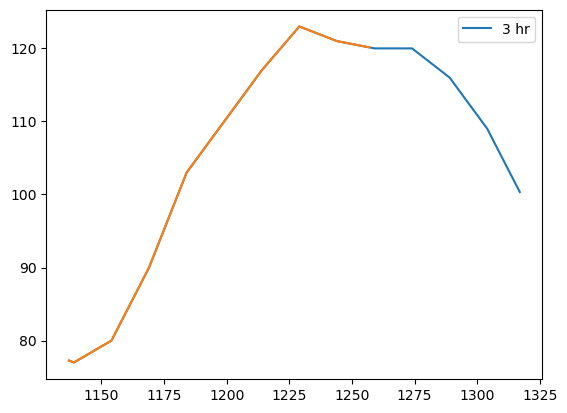


10/2/2021 9:52
3 hr: 21048.433333333334
2 hr 16516.6


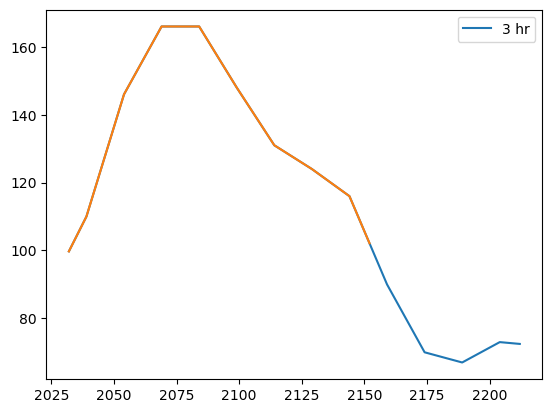


10/2/2021 13:29
3 hr: 16875.0
2 hr 11062.5


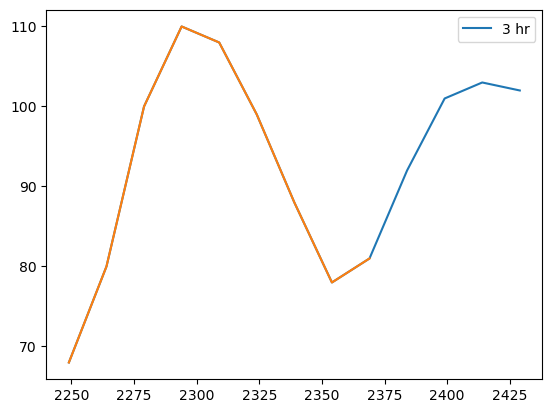


10/2/2021 19:40
3 hr: 16030.166666666668
2 hr 10485.366666666667


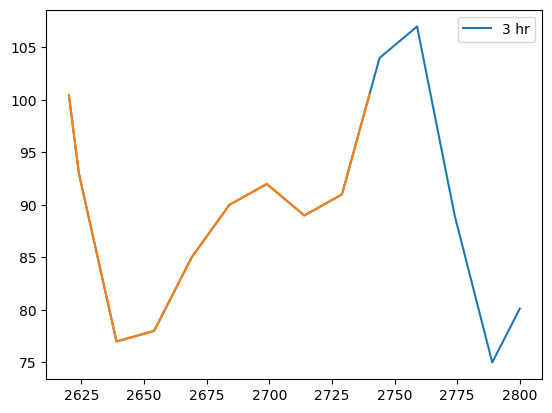


10/3/2021 9:49
3 hr: 18040.833333333332
2 hr 13725.833333333332


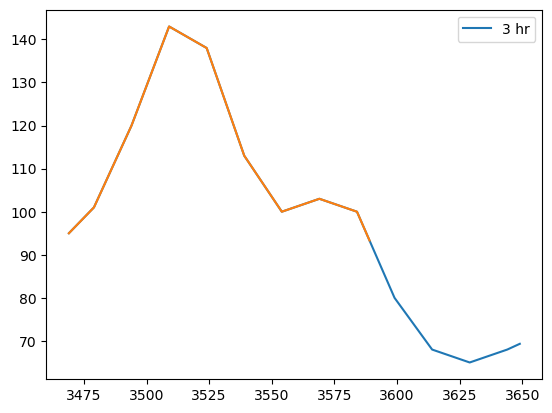


10/3/2021 13:37
3 hr: 14471.900000000001
2 hr 9672.466666666667


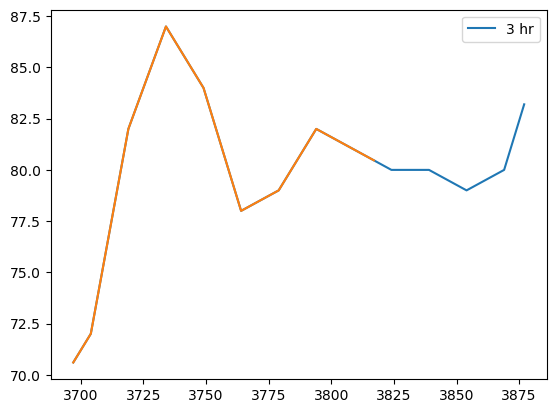


10/3/2021 16:45
3 hr: 19277.333333333336
2 hr 13347.7


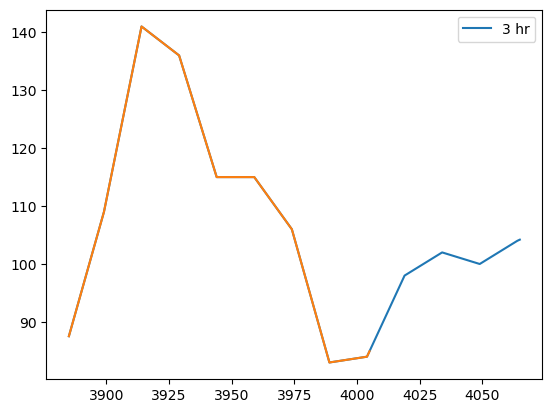


10/4/2021 9:01
3 hr: 20880.333333333332
2 hr 16601.166666666668


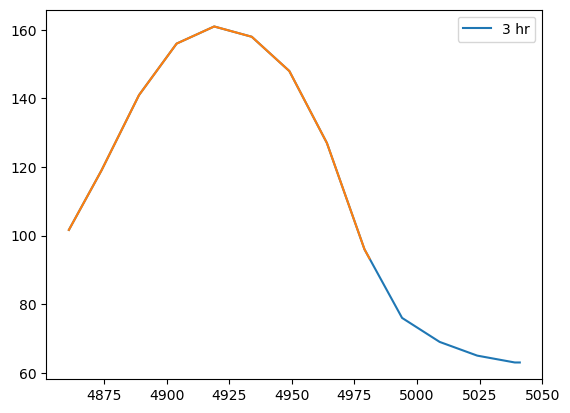


10/4/2021 12:34
3 hr: 22569.166666666664
2 hr 16107.5


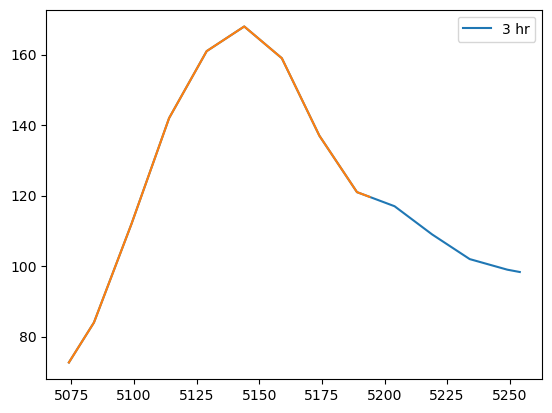


10/4/2021 18:03
3 hr: 14998.166666666668
2 hr 9155.766666666666


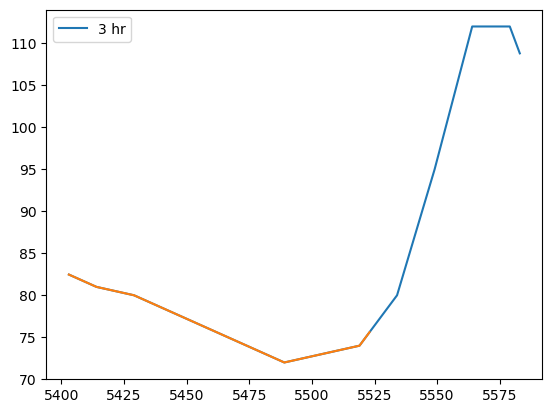


10/5/2021 8:56
3 hr: 19074.299999999996
2 hr 13606.8


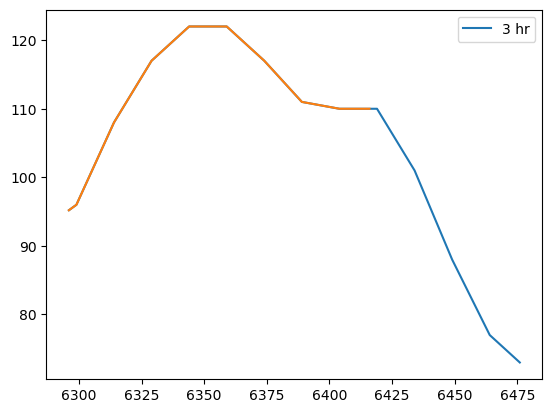


10/5/2021 12:25
3 hr: 12887.566666666668
2 hr 8390.233333333334


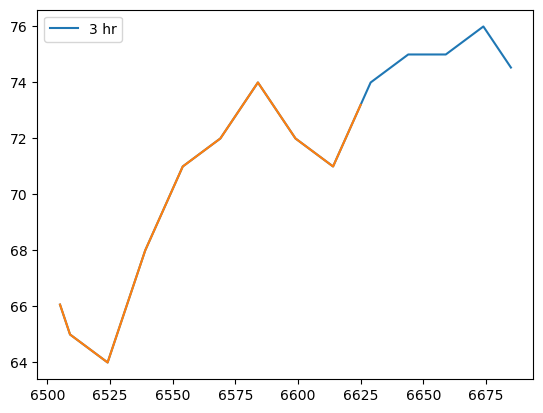


10/5/2021 20:23
3 hr: 16504.5
2 hr 10979.7


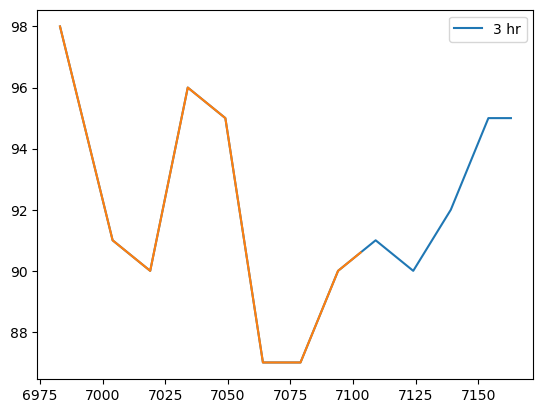


10/5/2021 20:54
3 hr: 16523.333333333332
2 hr 10897.5


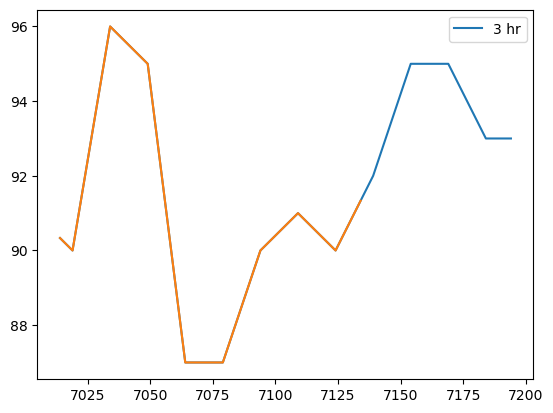


10/6/2021 8:56
3 hr: 15430.800000000003
2 hr 11379.600000000002


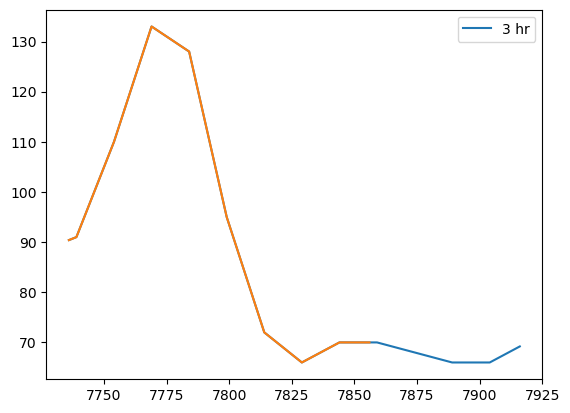


10/6/2021 12:25
3 hr: 17575.3
2 hr 11823.733333333334


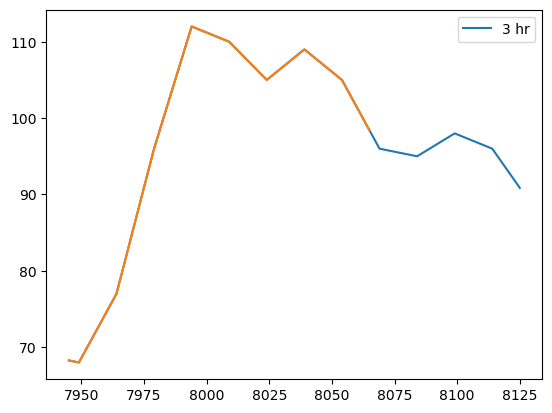


10/6/2021 17:42
3 hr: 14875.266666666666
2 hr 9979.433333333334


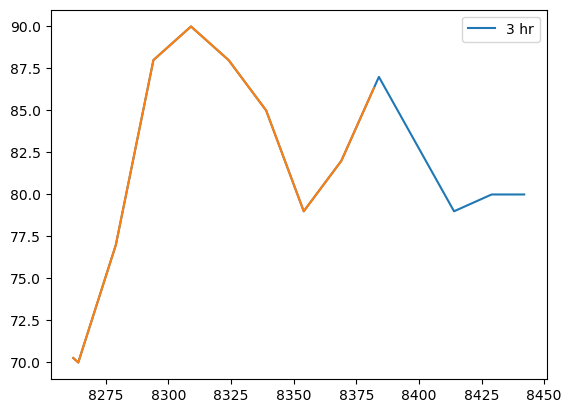


10/6/2021 22:39
3 hr: 14400.0
2 hr 10177.5


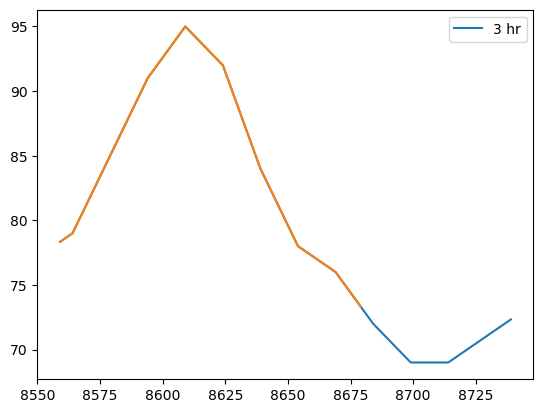


10/7/2021 8:49
3 hr: 19998.333333333336
2 hr 15820.0


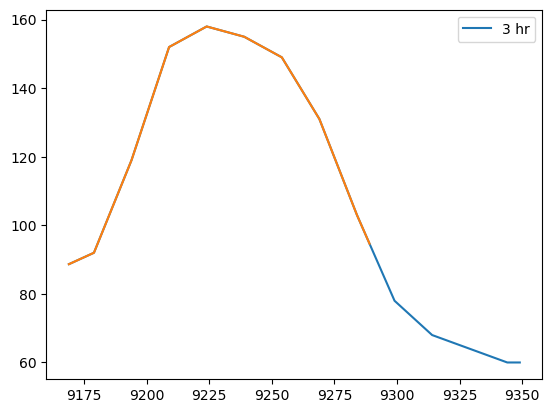


10/7/2021 12:26
3 hr: 17708.1
2 hr 12241.2


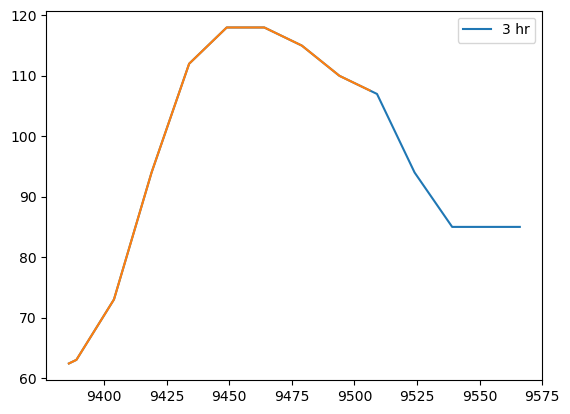


10/7/2021 20:17
3 hr: 18340.5
2 hr 12388.5


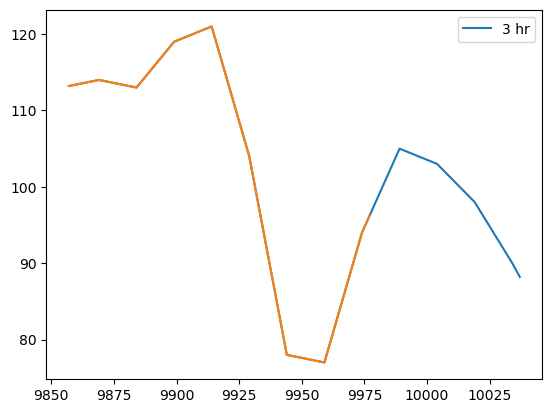


10/8/2021 8:57
3 hr: 20203.653191489364
2 hr 14164.65319148936


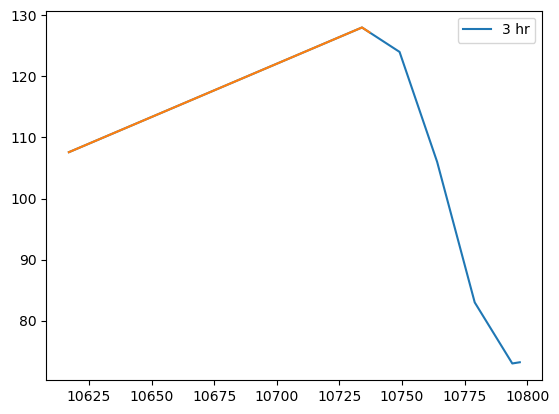


10/8/2021 12:23
3 hr: 14153.933333333332
2 hr 9231.966666666667


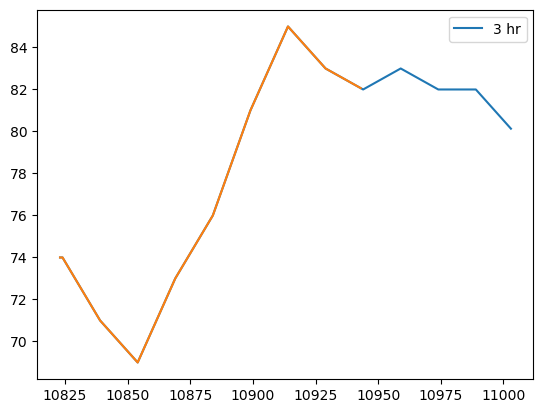


10/8/2021 18:13
3 hr: 17338.966666666667
2 hr 11165.733333333334


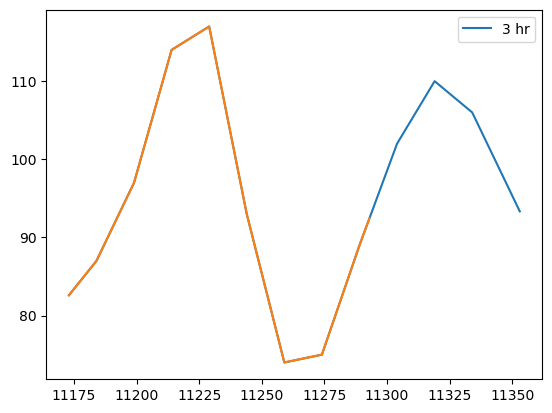


10/9/2021 9:33
3 hr: 19773.899999999998
2 hr 14345.099999999999


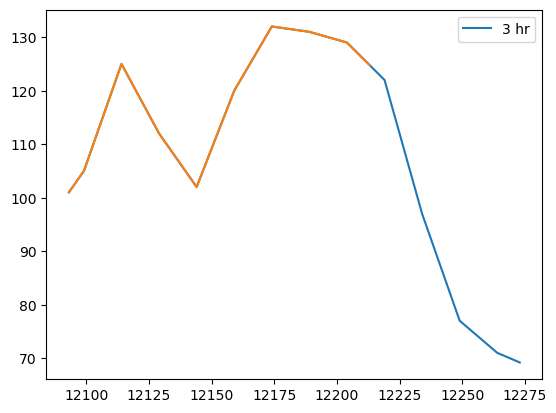


10/9/2021 15:02
3 hr: 15894.899999999998
2 hr 10993.233333333334


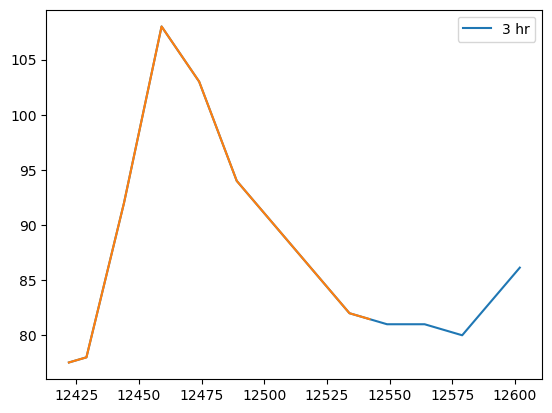


10/9/2021 18:19
3 hr: 17765.833333333336
2 hr 11304.166666666666


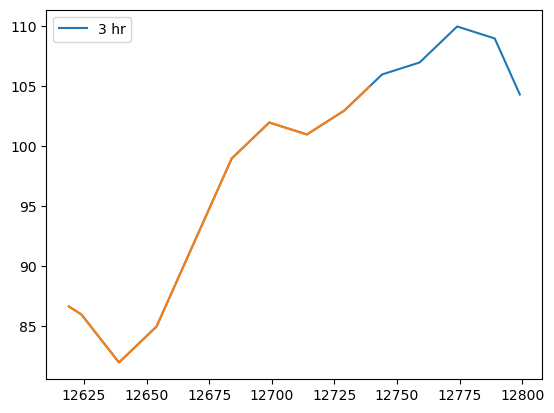


10/9/2021 21:59
3 hr: 18403.333333333332
2 hr 12328.333333333332


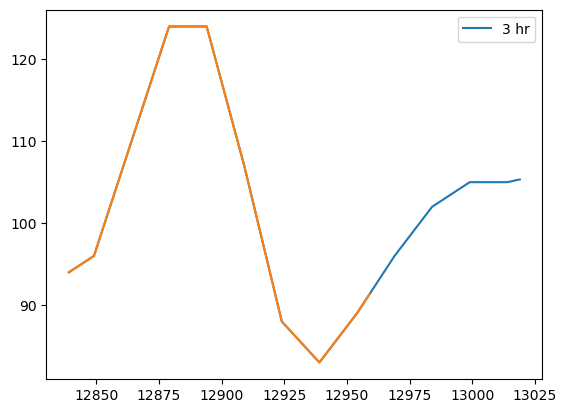


10/10/2021 9:30
3 hr: 15003.6
2 hr 10702.5


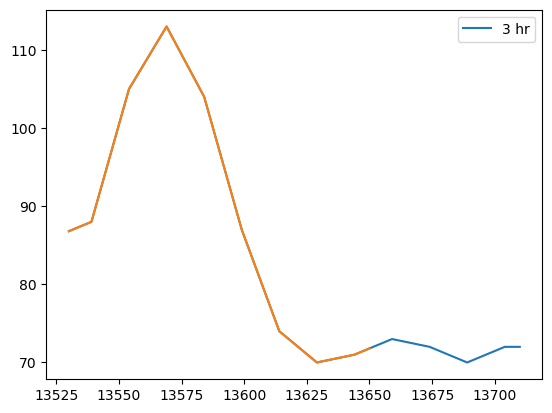


10/10/2021 13:18
3 hr: 19256.4
2 hr 13386.0


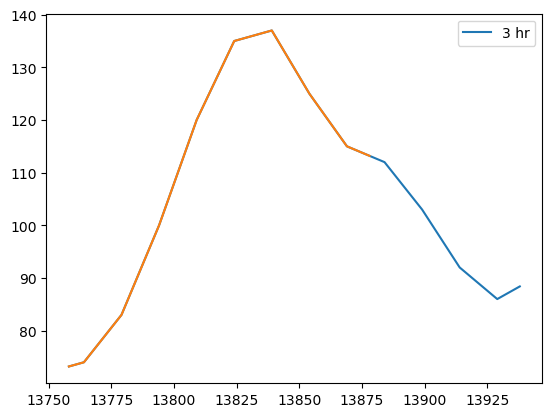


10/10/2021 18:01
3 hr: 15941.4
2 hr 10498.566666666666


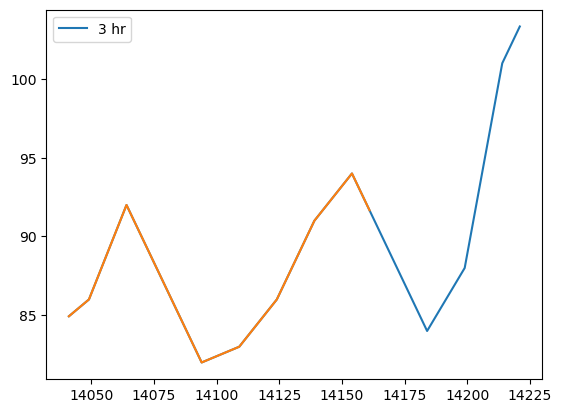


10/11/2021 7:47
3 hr: 16355.066666666666
2 hr 11508.833333333332


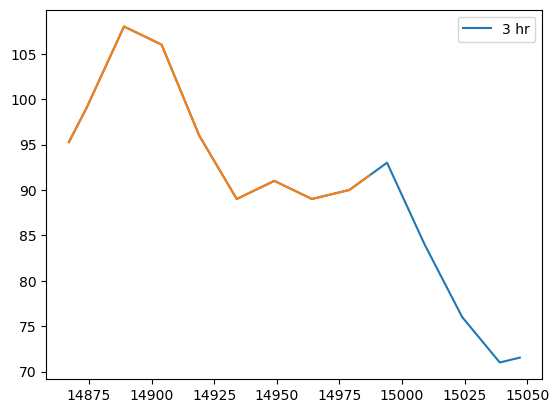

In [9]:
#read entire file and calculate
twohr = []
threehr = []
mldata = pd.read_csv("C:\\Users\\namil\\Downloads\\004.csv").dropna()
mldata['Meal Time'] = mldata['Meal Time'].to_numpy()
for i in mldata['Meal Time']:
        print('\n' + i)
        iaucAll(str(i), twohr, threehr)
df = pd.DataFrame({'three hours': threehr, 'two hours': twohr})
df.to_csv('ppgr metrics')